In [2]:
import sys
sys.path.append('..')
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyvips
import cv2
from PIL import Image

from submission.wsi.blur_detector import BlurDetector

import warnings; warnings.filterwarnings('ignore')

In [10]:
img = pyvips.Image.new_from_file('../data/originals/0i5nawnj.tif', access='sequential', page=5)
img = img.numpy()
img.shape

(1944, 5040, 3)

In [7]:
img = pyvips.Image.new_from_file('../data/originals/0i5nawnj.tif', access='sequential', page=5)
img = np.ndarray(buffer=img.write_to_memory(), dtype=np.uint8, shape=(img.height, img.width, 3))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [8]:
def detect_plot(img, kernel_size=7, rf_iter=3, downsample=4):
    blur_detector = BlurDetector(
        downsampling_factor=downsample, num_scales=3, scale_start=2, entropy_filt_kernel_sze=kernel_size, 
        sigma_s_RF_filter=15, sigma_r_RF_filter=0.25, num_iterations_RF_filter=rf_iter
    )
    return blur_detector.detectBlur(img)    

- kernel size variations with 0by07vj3.tif

In [75]:
%timeit detect_plot(img, kernel_size=3)
%timeit detect_plot(img, kernel_size=7)
%timeit detect_plot(img, kernel_size=15)
%timeit detect_plot(img, kernel_size=30)
%timeit detect_plot(img, kernel_size=75)

100%|██████████| 248/248 [00:02<00:00, 93.03it/s]


100%|██████████| 248/248 [00:02<00:00, 102.26it/s]


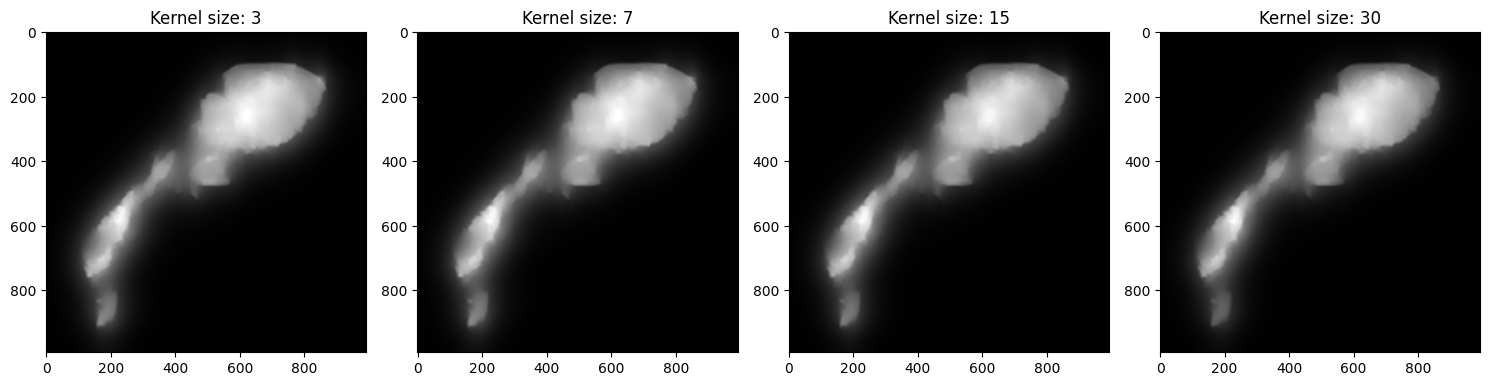

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
kernel_size = [3, 7, 15, 30]
for ax, kernel in zip(axes.ravel(), kernel_size):
    mask = detect_plot(kernel)
    ax.imshow(mask, cmap='gray')
    ax.set_title(f"Kernel size: {kernel}")
plt.tight_layout()
plt.show()

100%|██████████| 486/486 [00:26<00:00, 18.29it/s]


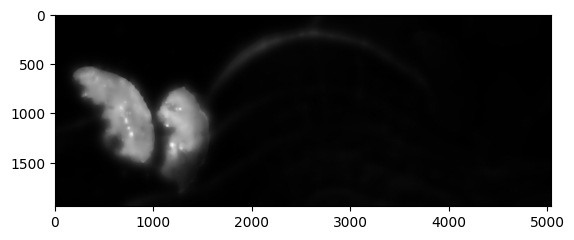

In [9]:
mask = detect_plot(img)
plt.imshow(mask, cmap='gray')

In [53]:
%matplotlib qt
img = pyvips.Image.new_from_file('../data/originals/0a8f2tx6.tif', access='sequential', page=4)
img = np.ndarray(buffer=img.write_to_memory(), dtype=np.uint8, shape=(img.height, img.width, 3))
plt.imshow(img)